In [42]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline


# DATA VISUALIZATION
1. plot and observe all the attributes and record inference from each of em

In [43]:
train = pd.read_csv('Dataset/train.csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [44]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:>

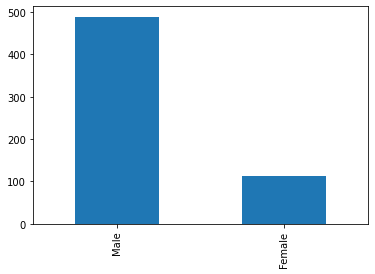

In [45]:
train['Gender'].value_counts().plot.bar()

1. Majority applicants who need loan are male

<AxesSubplot:title={'center':'Gender'}>

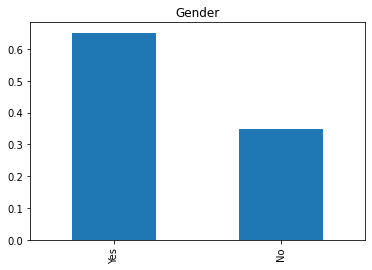

In [46]:
train['Married'].value_counts(normalize=True).plot.bar(title = 'Gender')
# train['Married'].value_counts( )
# train['Married']
# total = train['Married'].sum()
# def percentage():


    

1. Majority [75%]applicants are married

<AxesSubplot:title={'center':'Education'}>

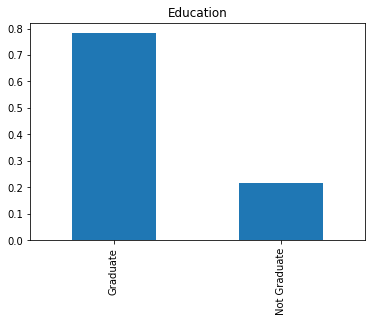

In [47]:
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

3. Majority [~80%] applicants are graduates

<AxesSubplot:title={'center':'Dependents'}>

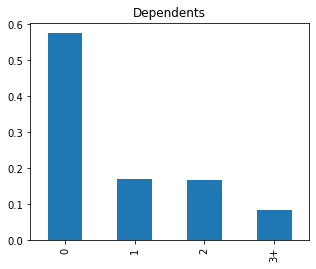

In [48]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize = (5,4),title = 'Dependents')


4. Majority applicants [~60%]have 0 dependents

<AxesSubplot:title={'center':'Self_Employed'}>

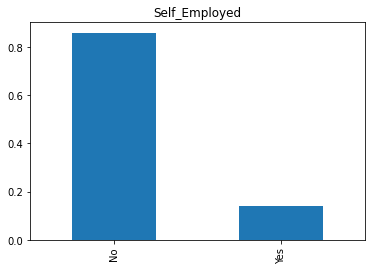

In [49]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title = 'Self_Employed')


5. 15% of the applicants are self_Employed

<AxesSubplot:title={'center':'Property_Area'}>

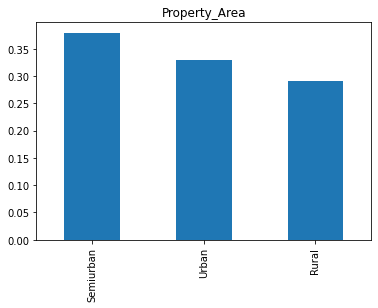

In [50]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title = 'Property_Area')


6. Majority applicants are from semiurban

<AxesSubplot:title={'center':'Credit_History'}>

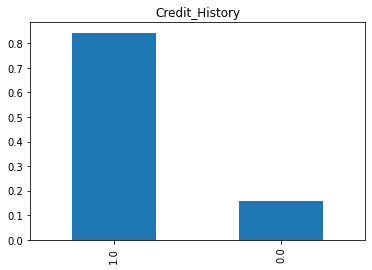

In [51]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title = 'Credit_History')

7. Majority applicants have credit History 1.0 i.e around 85% people have repaid their debts

<AxesSubplot:>

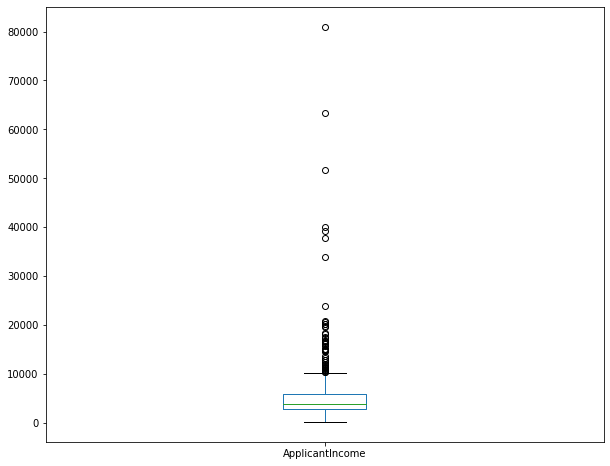

In [52]:
train['ApplicantIncome'].plot.box(figsize = (10,8))

<AxesSubplot:>

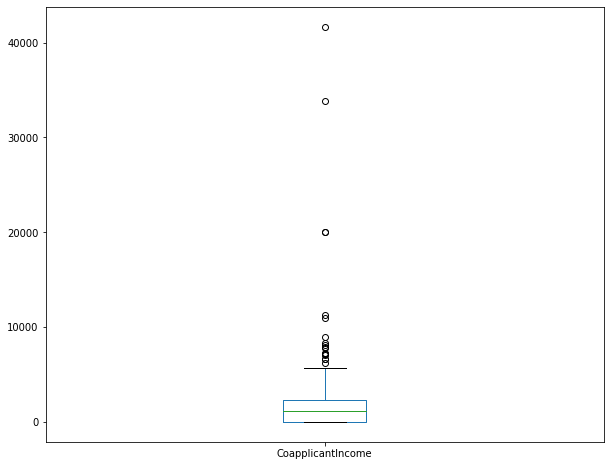

In [53]:
train['CoapplicantIncome'].plot.box(figsize = (10,8))

<AxesSubplot:>

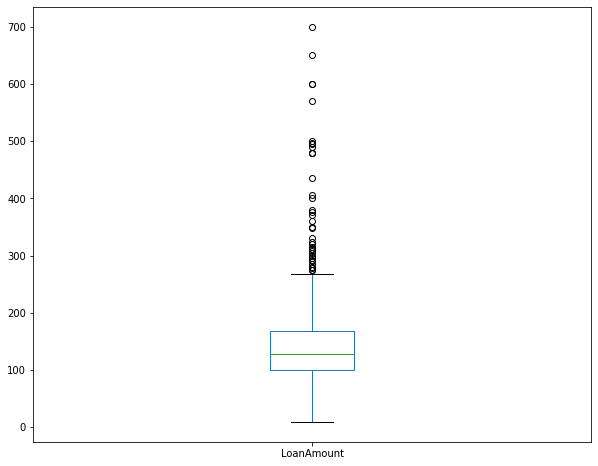

In [54]:
train['LoanAmount'].plot.box(figsize = (10,8))

#### Lets compare these attributes with our target variable i.e Loan_Status and plot them using matplotlib

<AxesSubplot:title={'center':'Gender'}, xlabel='Gender'>

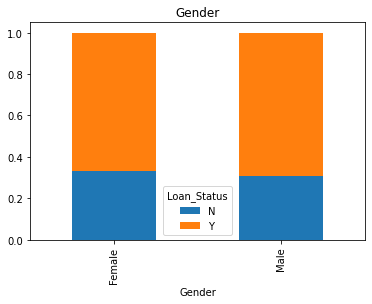

In [55]:
Gender  = pd.crosstab(train['Gender'],train['Loan_Status'])
# Gender.div(Gender.sum(1).astype(float))
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind = 'bar',stacked =True,title = 'Gender')

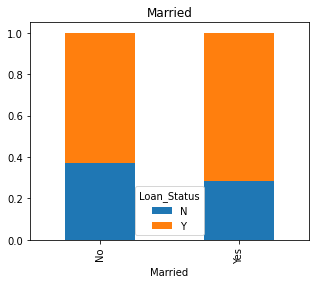

In [56]:
Married =pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True,title = 'Married',figsize = (5,4))
plt.show()





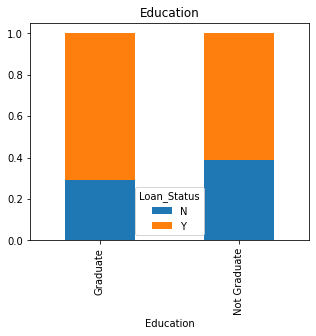

In [57]:
Education =pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True,title = 'Education',figsize = (5,4))
plt.show()


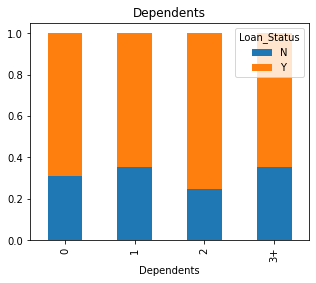

In [58]:
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked = True,title = 'Dependents',figsize= (5,4))
plt.show()


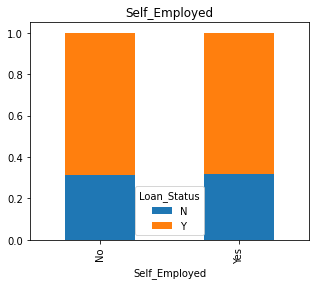

In [59]:
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked = True,title = 'Self_Employed',figsize= (5,4))
plt.show()


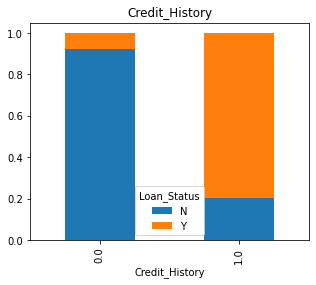

In [60]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked = True,title = 'Credit_History',figsize= (5,4))
plt.show()


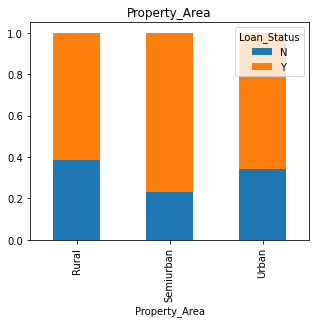

In [61]:
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked = True,title = 'Property_Area',figsize= (5,4))
plt.show()

#### Now, for applicantIncome, co_applicantIncome, LoanAMount, LoanAMount Term these columns we can't directly plot bar as we won't be able to effeciently infer the information from the data 
1. So, we will be using binning process to concatenate data to ranges and then try to infer info 

<AxesSubplot:title={'center':'Income_bin'}, xlabel='Income_bin'>

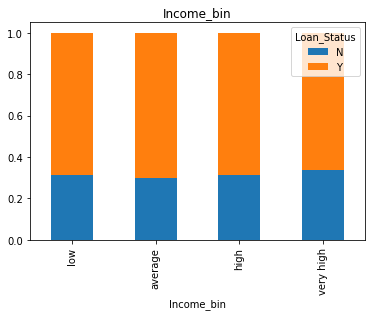

In [62]:
#First attribute/ column is applicantIncome
Bins =[0,2500,4000,6000,81000]
group = ['low','average','high','very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],Bins,labels=group)
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked = True,figsize = (6,4),title = 'Income_bin')

<AxesSubplot:title={'center':'CoApplicant_Income_bin'}, xlabel='CoApplicant_Income_bin'>

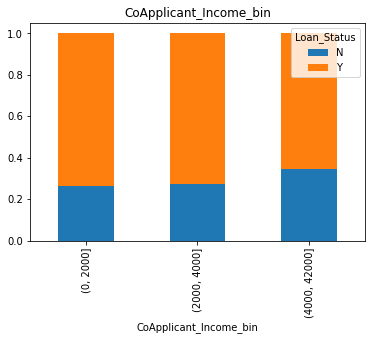

In [76]:
Bins = [0,2000,4000,42000]
group = ['low','average','high']
train['CoApplicant_Income_bin']  = pd.cut(train['CoapplicantIncome'],Bins,group)
CoApplicant_Income_bin = pd.crosstab(train['CoApplicant_Income_bin'],train['Loan_Status'])
CoApplicant_Income_bin.div(CoApplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind = 'bar',stacked = True  ,title = 'CoApplicant_Income_bin',figsize=(6,4))
